In [24]:
%matplotlib notebook
from handler import Session
from handler import engine
from leg import Leg
from datetime import datetime
from datetime import date
from datetime import time
from sqlalchemy.sql import text
import matplotlib.pyplot as plt
import matplotlib.dates as mpldates

session = Session()

## Graph a particular flight

In [25]:
def draw(l, title, filter):
    same = [leg for leg in l if filter(leg)]

    weekdays = [d for d in same if d.departure_date.isoweekday() in range(1,5)]
    friday = [d for d in same if d.departure_date.isoweekday() == 5]
    weekends = [d for d in same if d.departure_date.isoweekday() in (6,7)]

    def prices(lst):
        return [mpldates.date2num(d.departure_date) for d in lst], [d.price for d in lst]

    plt.figure(figsize=(8,8))
    plt.plot_date(prices(weekdays)[0], prices(weekdays)[1], 'g^', label='$Weekdays$')
    plt.plot_date(prices(friday)[0], prices(friday)[1], 'b^', label='$Fridays$')
    plt.plot_date(prices(weekends)[0], prices(weekends)[1], 'r^', label='$Weekends$')
    plt.ylabel('Price (£)')
    plt.xlabel('Departure date')
    plt.title(title)
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


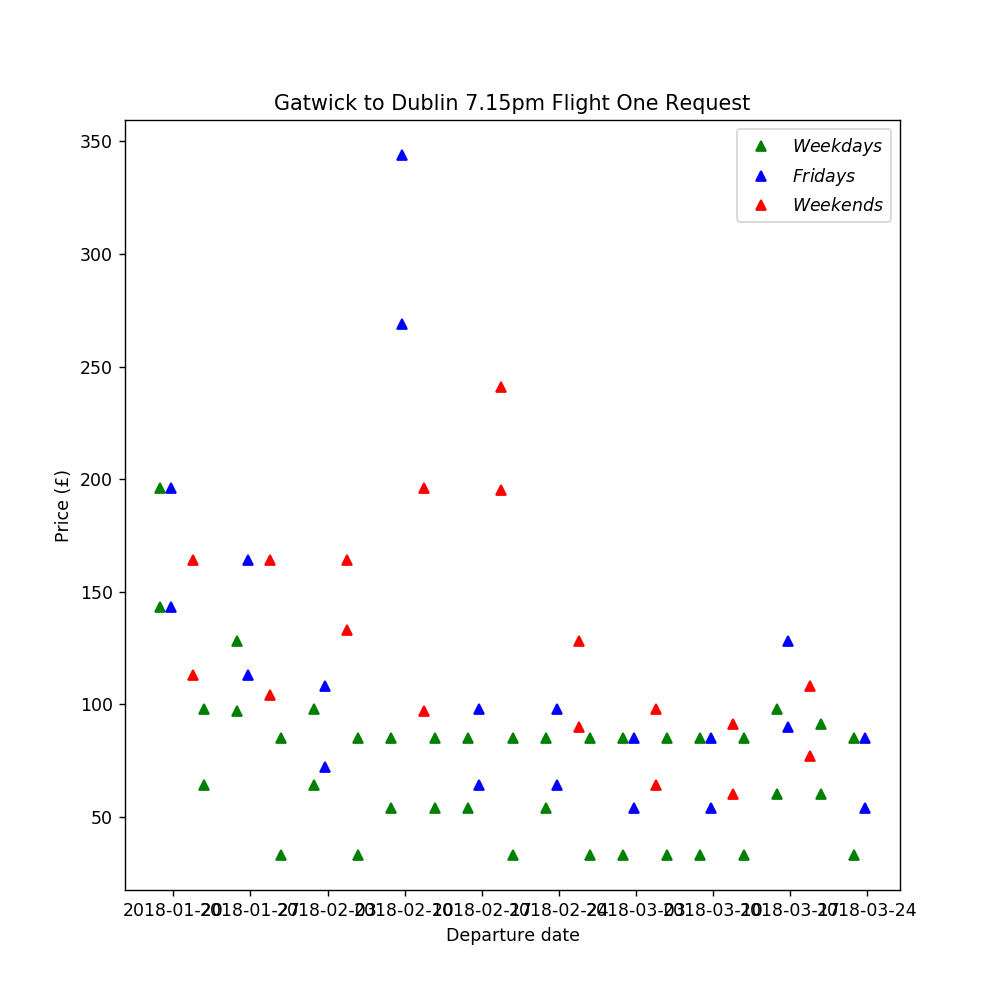

In [26]:
l = session.query(Leg).\
    filter(Leg.departure_location == 'LGW').\
    filter(Leg.arrival_location == 'DUB').\
    filter(Leg.request_time >= datetime(2018,1,17,0,0,0)).\
    filter(Leg.request_time < datetime(2018, 1, 18, 0, 0, 0))

draw(l, 'Gatwick to Dublin 7.15pm Flight One Request', lambda leg: leg.departure_date.time() == time(19, 15))

## Cost of an LGW-DUB flight after 4pm

2018-01-18 19:35:08,839 - sqlalchemy.pool.QueuePool - ERROR - Exception during reset or similar
Traceback (most recent call last):
  File "c:\users\alex\.virtualenvs\jambalaya-nhxu4p1r\lib\site-packages\pymysql\connections.py", line 1025, in _read_bytes
    data = self._rfile.read(num_bytes)
  File "c:\users\alex\anaconda3\Lib\socket.py", line 586, in readinto
    return self._sock.recv_into(b)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\alex\.virtualenvs\jambalaya-nhxu4p1r\lib\site-packages\sqlalchemy\pool.py", line 703, in _finalize_fairy
    fairy._reset(pool)
  File "c:\users\alex\.virtualenvs\jambalaya-nhxu4p1r\lib\site-packages\sqlalchemy\pool.py", line 873, in _reset
    pool._dialect.do_rollback(self)
  File "c:\users\alex\.virtualenvs\jambalaya-nhxu4p1r\lib\site-packages\sqlalchemy\dialects\mysql\base

<IPython.core.display.Javascript object>


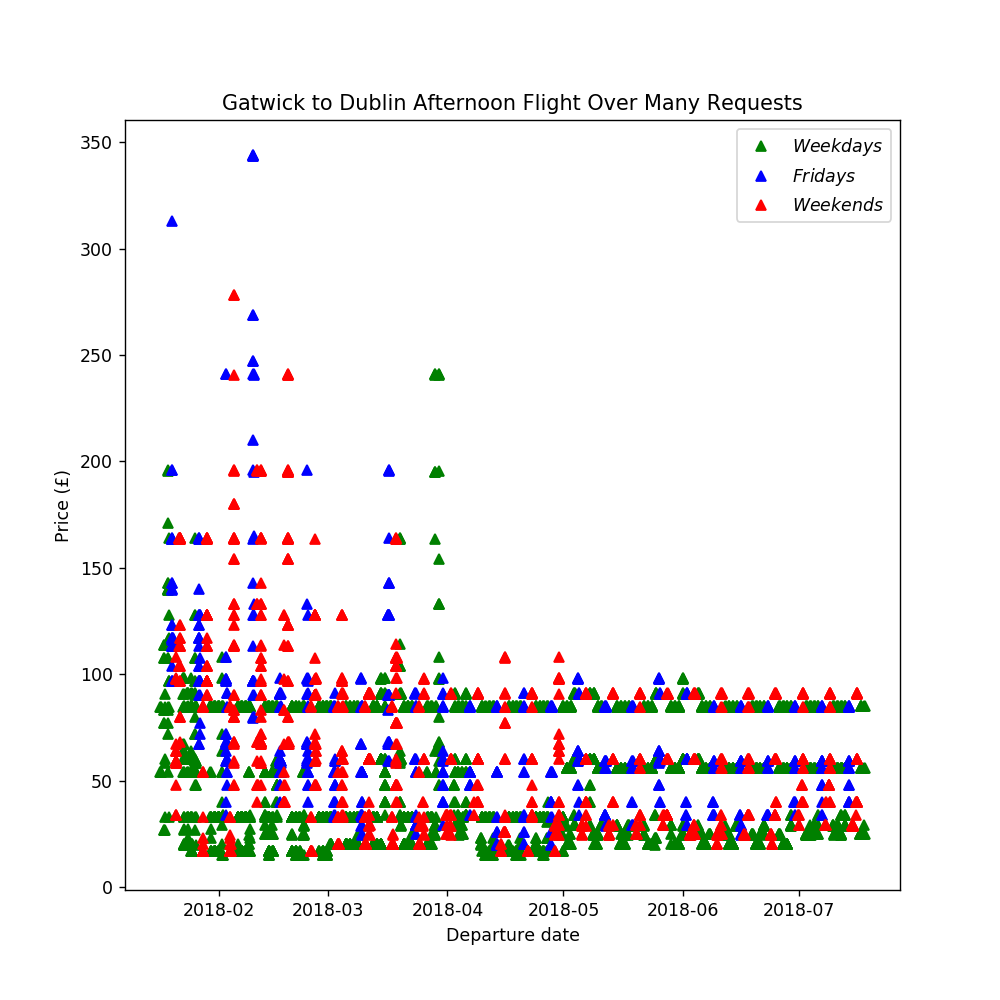

In [27]:
l = session.query(Leg).\
    filter(Leg.departure_location == 'LGW').\
    filter(Leg.arrival_location == 'DUB')

draw(l, 'Gatwick to Dublin Afternoon Flight Over Many Requests', lambda leg: leg.departure_date.time() > time(16, 00))

## LGW to FCO over many requests

<IPython.core.display.Javascript object>


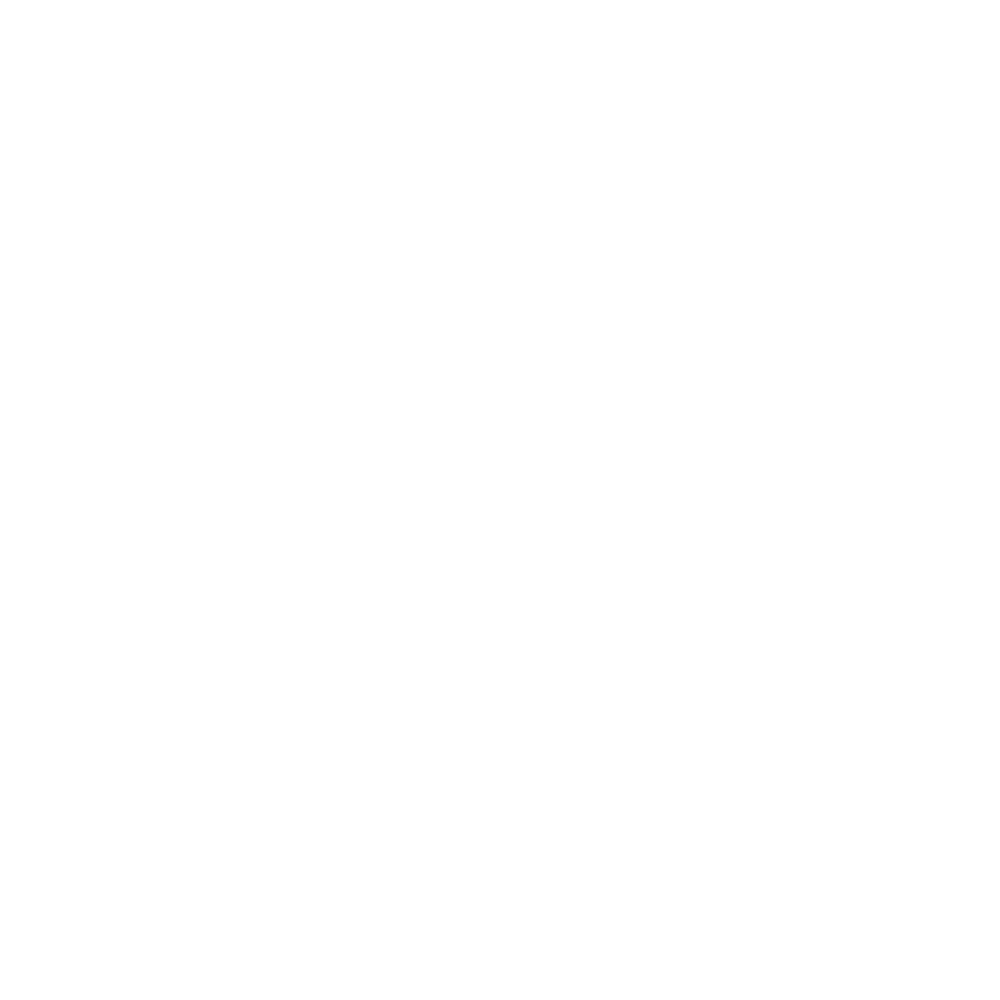

In [6]:
l = session.query(Leg).\
    filter(Leg.departure_location == 'LGW').\
    filter(Leg.arrival_location == 'FCO')

draw(l, 'Gatwick to Rome Evening Flight Over Many Requests', lambda leg: True)

OK, how about drawing lines for the price of 'similar flights', ie with the same airline at similar times of day? (Morning/Afternoon/Evening)




331
331


<IPython.core.display.Javascript object>


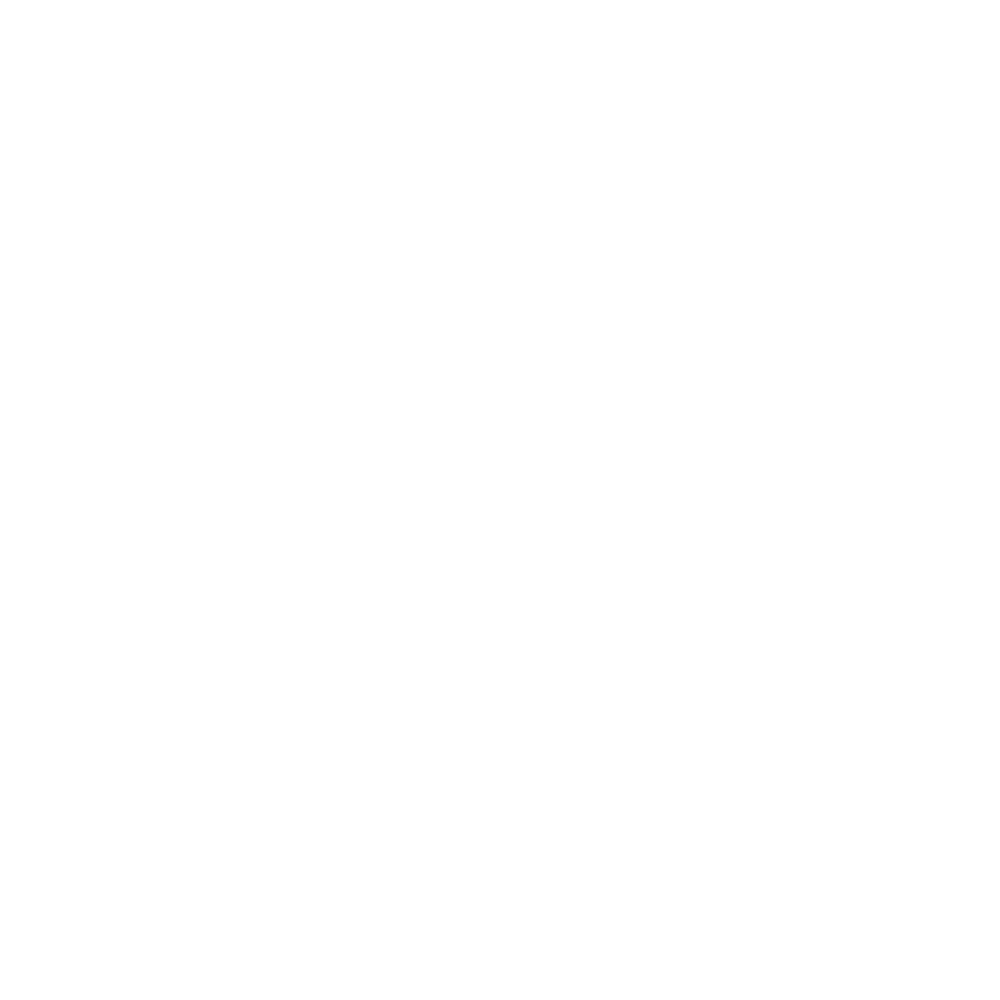

ValueError: x and y must have same first dimension, but have shapes (331,) and (1,)

In [23]:
statement = """
    SELECT departure_date, price 
    FROM leg
    WHERE departure_location = 'LGW'
    AND arrival_location = 'FCO'
    AND airline = 'easyJet'
    AND request_time BETWEEN '2018-01-17 00:00:00' AND '2018-01-17 23:59:59'
    """

with engine.connect() as con:

    morning = con.execute(statement+"HAVING HOUR(departure_date) < 12")
    afternoon = con.execute(statement+"HAVING HOUR(departure_date) BETWEEN 12 AND 17")
    evening = con.execute(statement+"HAVING HOUR(departure_date) > 17")
    
    
#list(map(print, morning))
dates, prices = [], []
for m in morning:
    dates.append(m[0])
    prices.append(m[1])
    #print(m[1])

print('\n\n')

#print(len(dates))
print(len(prices))

print(len(mpldates.date2num(dates)))

def prices(lst):
    return [mpldates.date2num(d[0]) for d in lst], [d[1] for d in lst]

#print(prices(morning))

plt.figure(figsize=(8,8))
plt.plot_date(mpldates.date2num(dates), prices, 'g-', label='$Mornings$')
plt.ylabel('Price (£)')
plt.xlabel('Departure date')
plt.title(title)
plt.legend()
plt.show()